## Introduction
Principal component analysis (PCA) is a statistical procedure that is used to reduce the dimensionality. It uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. It is often used as a dimensionality reduction technique.

* Steps Involved in the PCA
<ul>
<li>Step 1: Standardize the dataset.</li>
<li>Step 2: Calculate the covariance matrix for the features in the dataset.</li>  
<li>Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.</li> 
<li>Step 4: Sort eigenvalues and their corresponding eigenvectors.</li>
<li>Step 5: Pick k eigenvalues and form a matrix of eigenvectors.</li>  
<li>Step 6: Transform the original matrix.</li>  
</ul>





## Example
you have a dataset of two variables, and want to simplify it. You will probably not see a pressing need to reduce such an already succinct dataset, but let us use this example for the sake of simplicity.

for example, we plotted the x1 and x2 variables on the 2D scatter plot

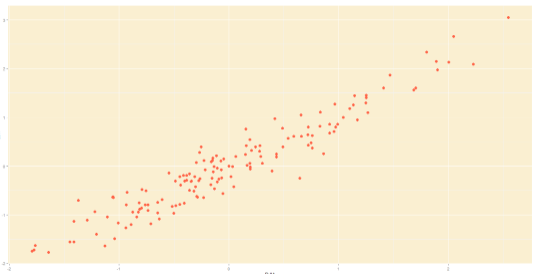




* The above points are represented in 2 axes: X and Y. In theory, PCA will allow us to represent the data along one axis. This axis will be called the principal component, and is represented by the black line.

* But first, we need to deduce the eigenvectors (there are two – one per axis). Each eigenvector will correspond to an eigenvalue, whose magnitude indicates how much of the data’s variability is explained by its eigenvector.

* Eigenvalues and Eigenvectors are important. Eigenvectors represent directions. Think of plotting your data on a multidimensional scatterplot. Then one can think of an individual Eigenvector as a particular “direction” in your scatterplot of data. Eigenvalues represent magnitude, or importance. Bigger Eigenvalues correlate with more important directions.

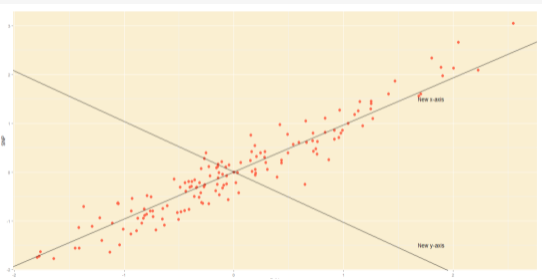

 we make an assumption that more variability in a particular direction correlates with explaining the behavior of the dependent variable. Lots of variability usually indicates signal, whereas little variability usually indicates noise. Thus, the more variability there is in a particular direction is, theoretically, indicative of something important we want to detect.
 
 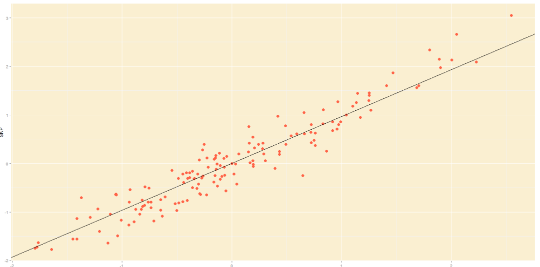

In [106]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [107]:
n_components = 2
components = None
mean = None

In [108]:
def fit(X):
    # Mean centering
    mean = np.mean(X, axis=0)
    X = X - mean
    # covariance, function needs samples as columns
    cov = np.cov(X.T)
    # eigenvalues, eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    # -> eigenvector v = [:,i] column vector, transpose for easier calculations
    # sort eigenvectors
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]
    # store first n eigenvectors
    components = eigenvectors[0:n_components]
    return components


In [109]:
def transform(X,components):
    # project data
    mean = np.mean(X, axis=0)
    X = X - mean
    return np.dot(X, components.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


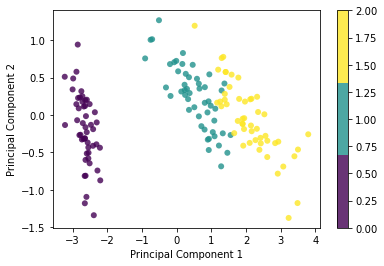

In [110]:
#data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
components = fit(X)
X_projected = transform(X,components)


print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()